In [2]:
from matplotlib import pyplot as plt
import random
import numpy as np

In [3]:
def fitness(a, b, c):
    nparray_x = np.genfromtxt('x_train.csv', delimiter = ',')
    nparray_y = np.genfromtxt('y_train.csv', delimiter = ',')
    lossSum = 0
    for i in range (0,1000):
        x = nparray_x[i]
        y = nparray_y[i]
        yprime = (x**2) * a + x * b + c
        loss = yprime - y
        lossSum = lossSum + (loss**2)
    return lossSum

In [4]:
def init_population():
    population = []
    for i in range(1, 41):
        population.append(init_individuals())
    # making the initial population made of random individuals.
    return population

In [5]:
def init_individuals():
    arr = []
    for i in range(1,4):
        arr.append(random.random()* 50 * random.choice([-1, 1])) 
    # making the random numbers for the function coefficients.
    return arr

In [6]:
def sort_population(population): #quick sort:
    quickSort(population, 0, np.shape(population)[0])
    return population
        
# reference : geeksforgeeks : https://www.geeksforgeeks.org/quick-sort/
def partition(arr,low,high): 
    i = ( low-1 )         # index of smaller element 
    pivot = fitness(arr[high][0], arr[high][1], arr[high][2])     # pivot # modified section to get the fitness function
  
    for j in range(low , high): 
  
        # If current element is smaller than the pivot 
        if   fitness(arr[j][0], arr[j][1], arr[j][2]) < pivot: 
          
            # increment index of smaller element 
            i = i+1 
            arr[i],arr[j] = arr[j],arr[i] 
  
    arr[i+1],arr[high] = arr[high],arr[i+1] 
    return ( i+1 ) 

# reference : geeksforgeeks : https://www.geeksforgeeks.org/quick-sort/
def quickSort(arr,low,high): 
    if low < high: 
  
        # pi is partitioning index, arr[p] is now 
        # at right place 
        pi = partition(arr,low,high) 
  
        # Separately sort elements before 
        # partition and after partition 
        quickSort(arr, low, pi-1) 
        quickSort(arr, pi+1, high) 

In [15]:
def crossover(newpopulation):
    temppop = newpopulation[0:20]
    for i in range(50):
        
        
        index1 = random.randint(0,19)
        index2 = random.randint(0,19)
        while (index1 > index2):
            index2 = random.randint(0,19)
        #print('index1 = ', index1)
        #print('index2 = ', index2)
        a_length = 3
        b_length = 3
        c_length = 0
        binarrayLen = a_length + b_length + c_length + 21
        # 21 is the size of the whole numbers in the float number which is constant
        
        array1 = abcarray(population[index1], a_length, b_length, c_length)
        array2 = abcarray(population[index2], a_length, b_length, c_length)
        numberofBits = random.randint(1, binarrayLen//2) 
        
        bfindex = set()
        newarray1 = array1[0:]
        newarray2 = array2[0:39]
        for j in range(numberofBits):
            coindex = random.randint(0,38)
            while(coindex in bfindex):
                coindex = random.randint(0,38)
            bfindex.add(coindex)
            newarray1[coindex] = array2[coindex]
            newarray2[coindex] = array1[coindex]
        
        # mutate for newarray1 :
        if(random.random() < 0.1):
            numberofBits = random.randint(1,39)
            bfindex = set()
            for j in range(numberofBits):
                mindex = random.randint(0,38)
                while(mindex in bfindex):
                    mindex = random.randint(0,38)
                bfindex.add(mindex)
                newarray1[mindex] = newarray1[mindex]^1
        # mutate for newarray2 :
        if(random.random() < 0.1):
            numberofBits = random.randint(0,38)
            bfindex = set()
            for j in range(numberofBits):
                mindex = random.randint(0,38)
                while(mindex in bfindex):
                    mindex = random.randint(0,38)
                bfindex.add(mindex)
                newarray2[mindex] = newarray2[mindex]^1
        individual1 = []
        individual1.append(array_float(newarray1[0:13]))
        individual1.append(array_float(newarray1[13:26]))
        individual1.append(array_float(newarray1[26:39]))
        individual2 = []
        individual2.append(array_float(newarray2[0:13]))
        individual2.append(array_float(newarray2[13:26]))
        individual2.append(array_float(newarray2[26:39]))
        temppop.append(individual1)
        temppop.append(individual2)
        
    return temppop
        

In [32]:
def genetic_algorithm():
    
    # initialize.
    population = init_population()
    
    for generation in range (0,80): 
        print('generation ================================================================ ',generation)
        temp = population[0:100]
        # sort by fitness fun
        population = sort_population(population)
        best = population[0]
        sum = 0
        for i in range (0, 100):
            sum += fitness(population[i][0], population[i][1], population[i][2])
        avg = sum/100
        for i in range (0, 10):
            print(i)
            fitnessi = fitness(population[i][0], population[i][1], population[i][2])
            print(fitnessi - fitness(temp[i][0], temp[i][1], temp[i][2]))
        print('average ======================================================== ', avg)
        print('best    ======================================================== ', fitness(best[0], best[1], best[2]))
        
        # delete the second half of the population
        newpopulation = population[0:100]
        # crossover
        population = crossover(newpopulation)
        print(np.shape(population))
        # mutate
    a = population[0][0]
    print('a = %s', a)
    b = population[0][1]
    print('b = %s', b)
    c = population[0][2]
    print('c = %s', c)
    print(fitness(a,b,c))

In [10]:
# reference : geeksforgeeks : https://www.geeksforgeeks.org/python-program-to-convert-floating-to-binary/
def float_bin(number, places = 6): 
    
    # split() seperates whole number and decimal  
    # part and stores it in two seperate variables 
    whole, dec = str(number).split(".") 
  
    # Convert both whole number and decimal   
    # part from string type to integer type 
    whole = int(whole) 
    dec = int (dec) 
  
    # Convert the whole number part to it's 
    # respective binary form and remove the 
    # "0b" from it. 
    res = bin(whole).lstrip("-0b") + "."
  
    # Iterate the number of times, we want 
    # the number of decimal places to be 
    for x in range(places): 
  
        # Multiply the decimal value by 2  
        # and seperate the whole number part 
        # and decimal part 
        whole, dec = str((decimal_converter(dec)) * 2).split(".") 
        
        # Convert the decimal part 
        # to integer again 
        dec = int(dec) 
  
        # Keep adding the integer parts  
        # receive to the result variable 
        res += whole 
    if(number < 0):
        return '1'+res 
    else:
        return '0'+res
  
# Function converts the value passed as 
# parameter to it's decimal representation 
def decimal_converter(num):  
    while num > 1: 
        num /= 10
    return float(num)

In [34]:
def float_array(num, places = 0):
    res = float_bin(num, places)
    whole , dec = res.split('.')
    sign = whole[0]
    whole = whole[1:len(whole)]
    for i in range(6 - len(whole)):
        whole = '0' + whole
        
    for i in range(places - len(dec)):
        dec = dec + '0'
        
    return toArray(sign + whole + dec)

# convert a string to an array :
def toArray(string):
    length = len(string)
    array = [0]*length
    for i in range(0, length):
        array[i] = int(string[i])
    return array
        
# convert an array to a binary str (bin):
def array_float(array):
    whole = array[0:7]
    arrlen = np.shape(array)[0]
    dec = array[7:]
    sign = whole[0]
    whole = whole[1:7]

    wholeSum = 0
    decSum = 0
    for i in range (0, 6):
        wholeSum += whole[i] * (2**(5-i))
        
    for i in range (0, arrlen):
        decSum += dec[i] * ((0.5)**(i+1))
        
    res = wholeSum + decSum
    return (-1 ** sign) * res

def abcarray(individual , a_length, b_length, c_length):
    a = float_array(individual[0], a_length)
    b = float_array(individual[1], b_length)
    c = float_array(individual[2], c_length)
    array = a + b + c
    return array

In [20]:
genetic_algorithm()

generation ================================================================  0
0
-2826477306348108.5
1
-1.5263711905771012e+16
2
-8248635301346863.0
3
-1.0194892812791504e+16
4
-1.886463982996275e+16
5
-2946698278971634.0
6
-2724382175385295.5
7
-2.56609372771781e+16
8
24209140213451.36
9
-807174112301293.2
average ========================================================  2328928955326476.0
best ========================================================  1647512173476.355
(200, 3)
generation ================================================================  1
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
average ========================================================  1495201987686223.0
best ========================================================  1647512173476.355
(200, 3)
generation ================================================================  2
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
average =======================================================

0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
average ========================================================  104274766922426.31
best ========================================================  1647512173476.355
(200, 3)
generation ================================================================  27
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
average ========================================================  104258226079899.3
best ========================================================  1647512173476.355
(200, 3)
generation ================================================================  28
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9
0.0
average ========================================================  104237602870572.73
best ========================================================  1647512173476.355
(200, 3)
generation ================================================================  29
0
0.0
1
0.0
2
0.0
3
0.0
4
0.0
5
0.0
6
0.0
7
0.0
8
0.0
9


KeyboardInterrupt: 

In [11]:
np.shape(init_population())

(200, 3)

In [1]:
array = [1, 1, 5 , 6, 2, 7]

In [2]:
array2 = array[0:6]

In [3]:
array2 == array

True

In [40]:
pop = [[2, -1, 5], [1, 3, 2], [-1, -1, 3]]

In [4]:
array2 is array

False

In [5]:
array[0] = 2

In [31]:
for i in range(0):
    print('hello')

In [25]:
fitness(3.0, -3.25, 0.0)

5606329199.9375

In [ ]:
1510561274021.0308 
1215831510622.2222
161958930807.62457
1449158181428.897
2848394878715.9727

In [41]:
fitness(2.6582501420574944, -3.23310996252113, 0.23000591008616178)
#fitness(3.4746654944856403, -9.687877208205393, 17.821521127539818)
#fitness(, , )

1449158181428.897

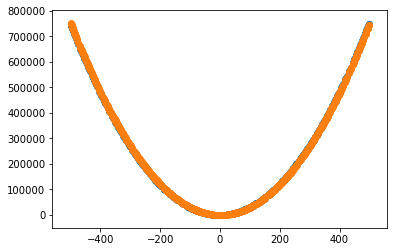

<Figure size 432x288 with 0 Axes>

In [38]:
nparray_x = np.genfromtxt('x_train.csv', delimiter = ',')
nparray_y = np.genfromtxt('y_train.csv', delimiter = ',')
a = 3
b = -3.0
c = 0.0
yprime = (nparray_x**2)*a + b* nparray_x + c
plt.scatter(nparray_x, nparray_y)
plt.scatter(nparray_x, yprime)
fig = plt.figure()

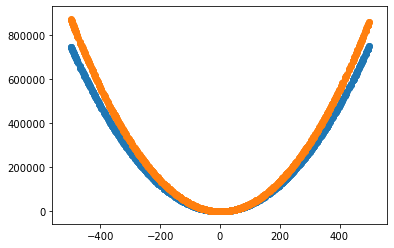

<Figure size 432x288 with 0 Axes>

In [33]:
nparray_x = np.genfromtxt('x_train.csv', delimiter = ',')
nparray_y = np.genfromtxt('y_train.csv', delimiter = ',')
a = 3.4746654944856403
b = -9.687877208205393
c = 17.821521127539818
yprime = (nparray_x**2)*a + b* nparray_x + c
plt.scatter(nparray_x, nparray_y)
plt.scatter(nparray_x, yprime)
fig = plt.figure()

In [ ]:
average ========================================================  32849821982726.363
average ========================================================  32849821982726.363